In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
list_of_files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        list_of_files.append(file_path)
list_of_files

['/kaggle/input/startup-failures/Startup Failure (Finance and Insurance).csv',
 '/kaggle/input/startup-failures/Startup Failures.csv',
 '/kaggle/input/startup-failures/Startup Failure (Manufactures).csv',
 '/kaggle/input/startup-failures/Startup Failure (Retail Trade).csv',
 '/kaggle/input/startup-failures/Startup Failure (Health Care).csv',
 '/kaggle/input/startup-failures/Startup Failure (Food and services).csv',
 '/kaggle/input/startup-failures/Startup Failures (Information Sector).csv']

In [3]:
dfs = []
for sector in list_of_files:
        df_temp = pd.read_csv(f'{sector}', encoding='utf-8')
        dfs.append(df_temp)

In [4]:
df = pd.concat(dfs, ignore_index=True)

In [5]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,...,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,GoAnimate,Information,14 (2007-2021),DIY animation tool,$10M,Sold 2021; lost to Powtoon,Scale beats tools,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1220,Hitpost,Information,4 (2009-2013),Sports social app,$1M,Closed 2013; lost to X,Giants own fandom,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1221,Homer,Information,6 (2013-2019),Kids' reading app,$2.2M,Sold 2019; lost to Epic!,Kids' ed needs scale,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1222,Hot Potato,Information,2 (2009-2011),Social check-in app,$1.4M,Acquired 2011; shut down; lost to Foursquare,Early exits end,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
df.shape

(1224, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1224 non-null   object 
 1   Sector                  1224 non-null   object 
 2   Years of Operation      1224 non-null   object 
 3   What They Did           409 non-null    object 
 4   How Much They Raised    409 non-null    object 
 5   Why They Failed         409 non-null    object 
 6   Takeaway                409 non-null    object 
 7   Giants                  409 non-null    float64
 8   No Budget               409 non-null    float64
 9   Competition             409 non-null    float64
 10  Poor Market Fit         409 non-null    float64
 11  Acquisition Stagnation  409 non-null    float64
 12  Platform Dependency     383 non-null    float64
 13  Monetization Failure    409 non-null    float64
 14  Niche Limits            409 non-null    

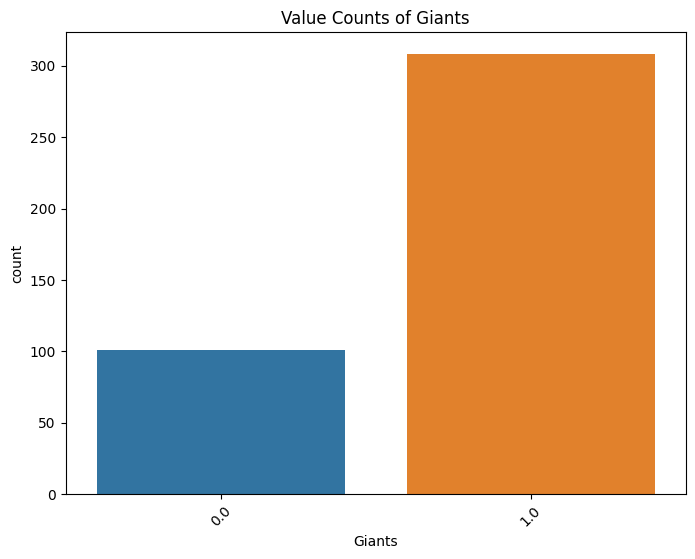

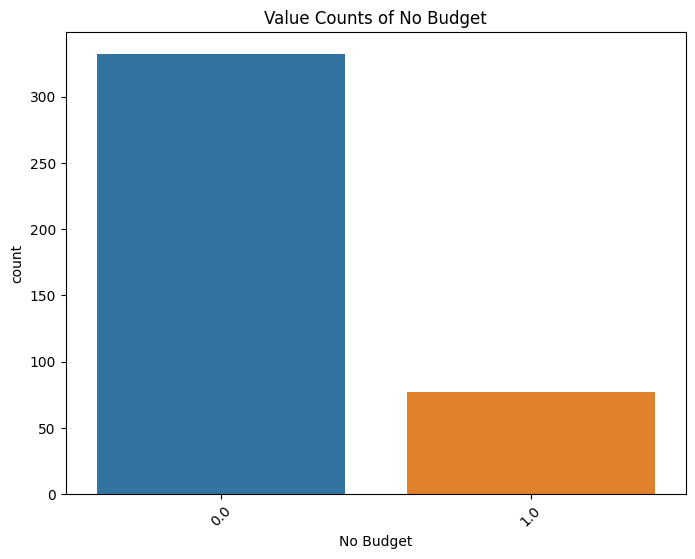

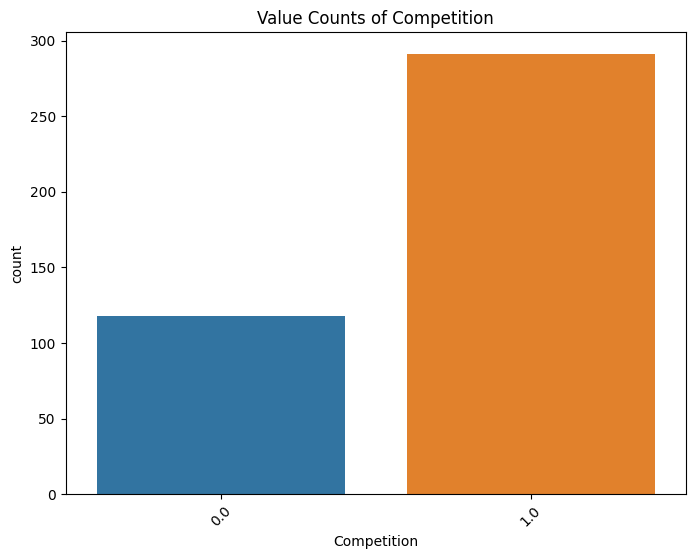

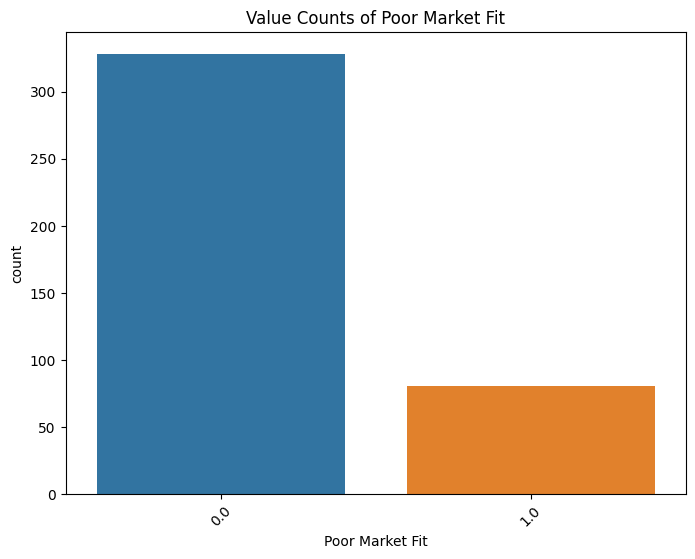

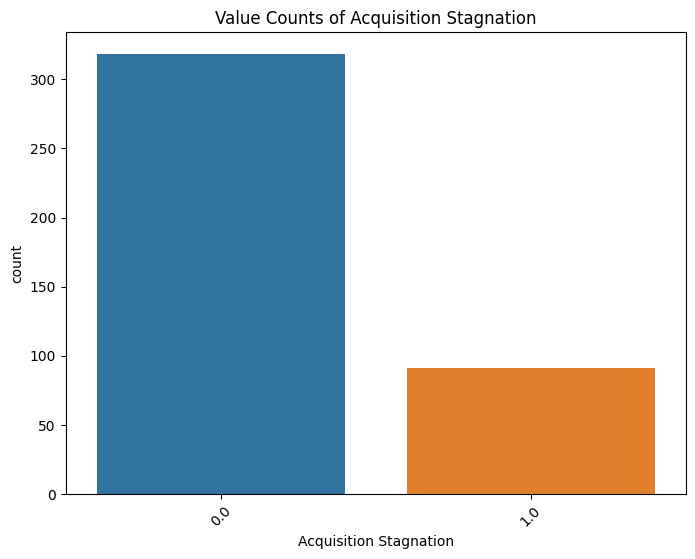

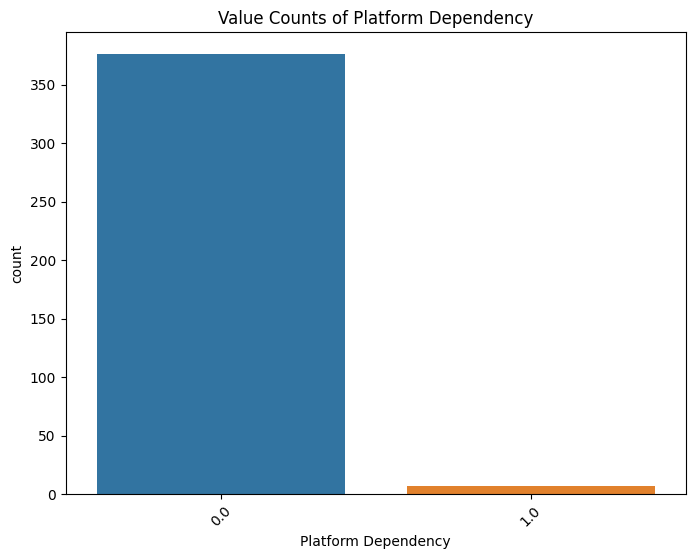

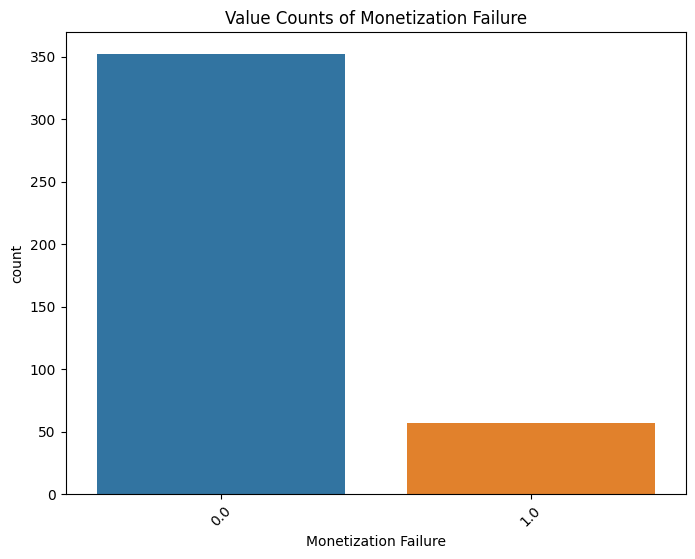

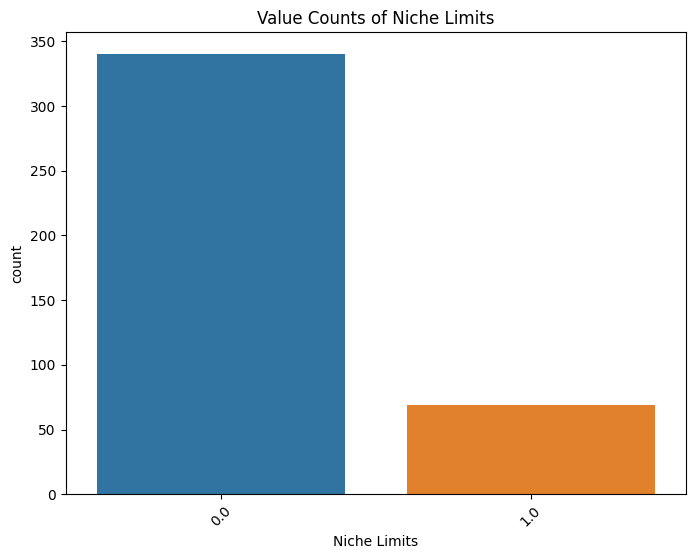

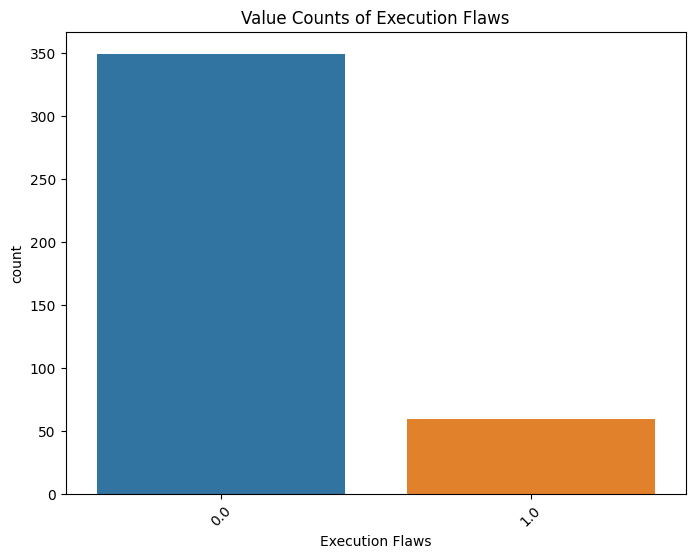

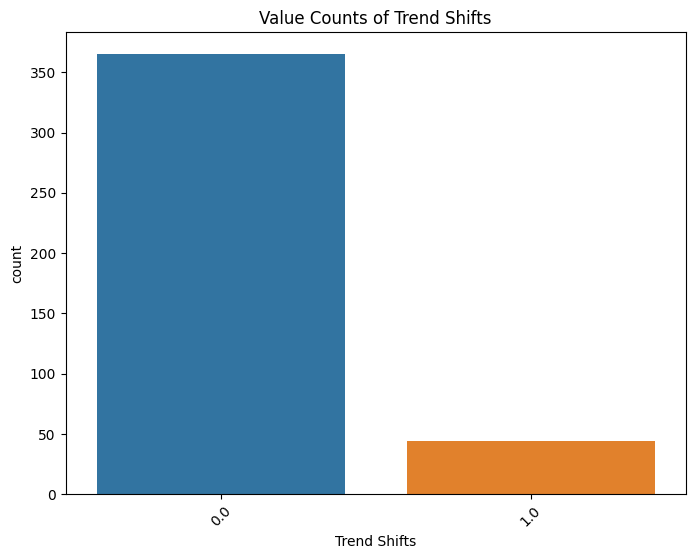

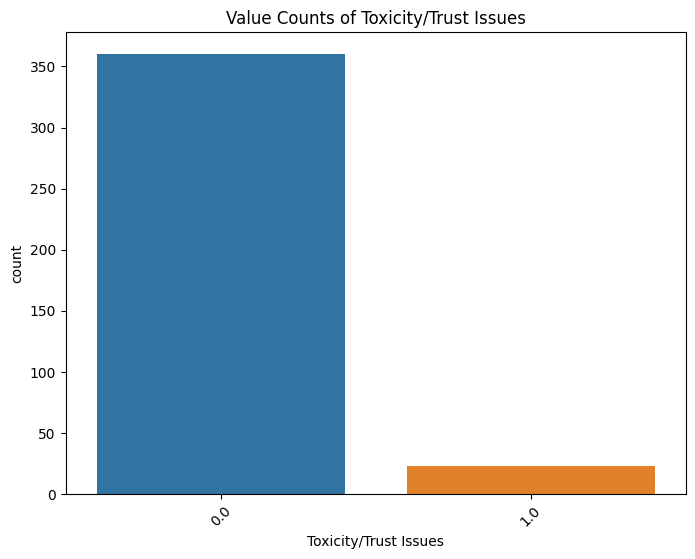

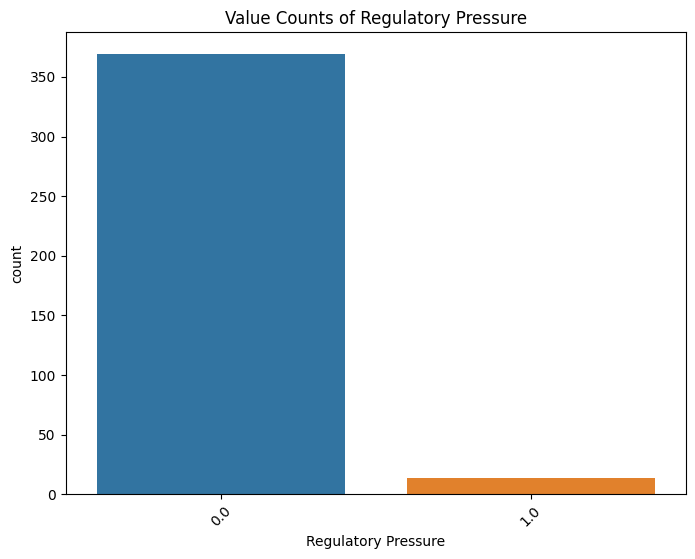

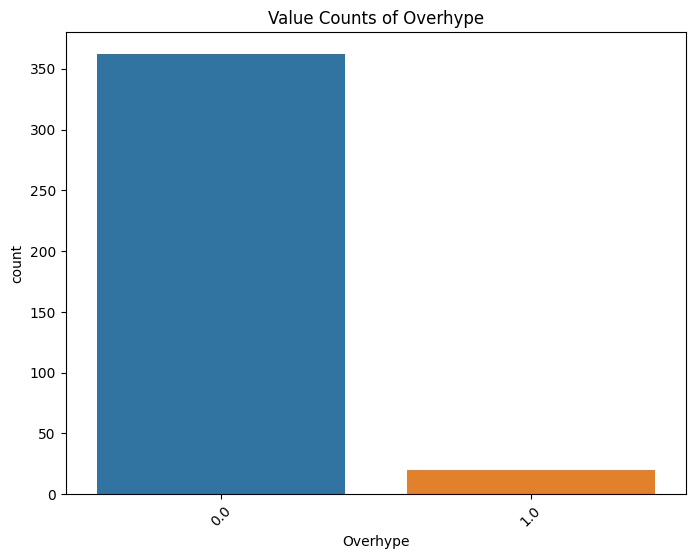

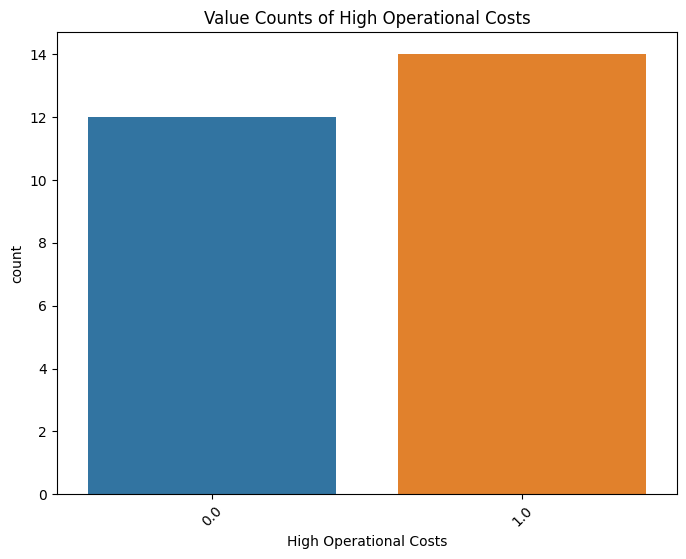

In [8]:
num_cols = ['Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype', 'High Operational Costs']

def get_count_plots(df, cols_list):
    for col in cols_list:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Value Counts of {col}')
        plt.xticks(rotation=45)
        plt.show()

get_count_plots(df, num_cols)